In [ ]:
try:
  %tensorflow_version 2.x # enable TF 2.x in Colab
except Exception:
  pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x # enable TF 2.x in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [ ]:
# Install the OpenSlide C library and Python bindings
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import random
import shutil
import time

from google.colab import drive
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Starter code to download small files
# Use this to download your starter CSV in notebook one and two.
# Also use it to download your thumbnails.zip in notebook two.
def download_if_missing(url, target, extract=True):
  if os.path.exists(target):
    return target
  return tf.keras.utils.get_file(target, origin=url, extract=extract)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/My Drive/adl_project/level5_train/"

In [ ]:
filenames = os.listdir(data_dir)
random.shuffle(filenames)

In [ ]:
test_files = filenames[0:3]
train_files = filenames[3:]

In [ ]:
test_files

['tumor_002.npz', 'tumor_101.npz', 'tumor_078.npz']

In [ ]:
train_files

['tumor_094.npz',
 'tumor_005.npz',
 'tumor_057.npz',
 'tumor_110.npz',
 'tumor_064.npz',
 'tumor_084.npz',
 'tumor_001.npz',
 'tumor_012.npz',
 'tumor_016.npz',
 'tumor_081.npz',
 'tumor_059.npz',
 'tumor_091.npz',
 'tumor_035.npz',
 'tumor_031.npz',
 'tumor_019.npz']

In [ ]:
def load_and_concat(directory, filenames, IMG_SIZE):
  
  #load each slide npz file and output image data and labels
  data_patches = np.empty([0, IMG_SIZE, IMG_SIZE, 3])
  data_labels = np.empty([0])

  for file in filenames:
    slide = np.load(directory+file)
    patches = slide["patch"]
    labels = slide["label"]
    data_patches = np.concatenate((data_patches, patches), axis=0)
    data_labels = np.concatenate((data_labels, labels), axis=0)

  return data_patches, data_labels

In [ ]:
IMG_SIZE = 150

test_patches, test_labels = load_and_concat(data_dir, test_files, IMG_SIZE)

In [ ]:
test_labels.shape

(3153,)

In [ ]:
train_patches, train_labels = load_and_concat(data_dir, train_files, IMG_SIZE)

In [ ]:
train_labels.shape

(14120,)

In [ ]:
'''train_ds = tf.data.Dataset.from_tensor_slices((train_patches, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_patches, test_labels))'''

'train_ds = tf.data.Dataset.from_tensor_slices((train_patches, train_labels))\ntest_ds = tf.data.Dataset.from_tensor_slices((test_patches, test_labels))'

In [ ]:
'''BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 100

train_ds  = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)'''

'BATCH_SIZE = 32\nSHUFFLE_BUFFER_SIZE = 100\n\ntrain_ds  = train_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)\ntest_ds = test_ds.batch(BATCH_SIZE)'

In [ ]:
'''for img, label in train_ds.take(2):
  print(img.shape, label.shape) # notice it's returning batches of data now'''

"for img, label in train_ds.take(2):\n  print(img.shape, label.shape) # notice it's returning batches of data now"

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
# build a new model reusing the pretrained base
model = tf.keras.Sequential([
  base_model
])

In [ ]:
from tensorflow.keras import datasets, layers, models

model.add(layers.Flatten())
model.add(layers.Dense(2, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class_weights = {0:1,
                 1:100}

In [ ]:
history = model.fit(train_patches, train_labels, batch_size=64, epochs=10, validation_data=(test_patches, test_labels), class_weight=class_weights)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 14120 samples, validate on 3153 samples
Epoch 1/10
14120/14120 [==============================] - 26s 2ms/sample - loss: 7.6583 - accuracy: 0.6096 - val_loss: 25.3302 - val_accuracy: 0.8116
Epoch 2/10
14120/14120 [==============================] - 15s 1ms/sample - loss: 5.5457 - accuracy: 0.7129 - val_loss: 63.8917 - val_accuracy: 0.8624
Epoch 3/10
14120/14120 [==============================] - 15s 1ms/sample - loss: 3.8815 - accuracy: 0.8107 - val_loss: 96.4185 - val_accuracy: 0.8792
Epoch 4/10
14120/14120 [==============================] - 15s 1ms/sample - loss: 2.8914 - accuracy: 0.8259 - val_loss: 100.9549 - val_accuracy: 0.8788
Epoch 5/10
14120/14120 [==============================] - 15s 1ms/sample - loss: 3.5089 - accuracy: 0.8278 - val_loss: 15.7807 - val_accuracy: 0.7520
Epoch 6/10
14120/14120 [==============================] - 15s 1ms/sample - loss: 4.9668 - accuracy: 0.7979 - val_loss: 136.3137 - val_accuracy: 0.8690

In [ ]:
# A plotting function you can reuse
def plot_history(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

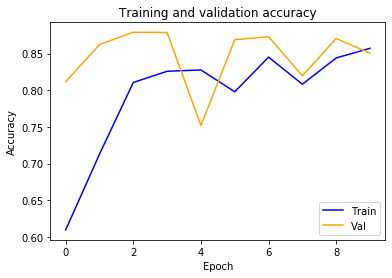

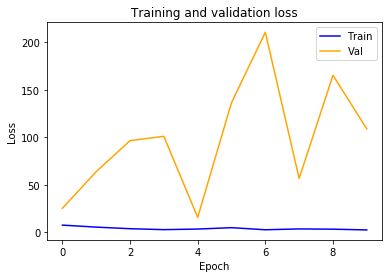

In [ ]:
plot_history(history)

In [ ]:
probas = model.predict(test_patches)

In [ ]:
preds = probas[:,1]

In [ ]:
#AUC ROC
import sklearn
from sklearn import metrics
fpr, tpr, thresholds= sklearn.metrics.roc_curve(test_labels, preds)

In [ ]:
roc_auc = sklearn.metrics.auc(fpr,tpr)

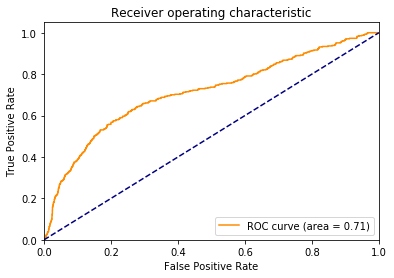

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

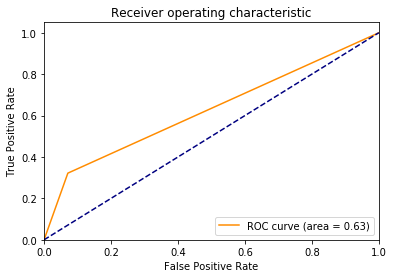

In [ ]:
#FROC tumor locanization
Ffpr, Ftpr, Fthresholds= sklearn.metrics.roc_curve(test_labels, np.argmax(probas, axis=1))
Froc_auc = sklearn.metrics.auc(Ffpr,Ftpr)
plt.figure()
plt.plot(Ffpr, Ftpr, color='darkorange', label='ROC curve (area = %0.2f)' % Froc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
test_dir = '/content/drive/My Drive/adl_project/dataset/'

In [ ]:
os.listdir(test_dir)

['tumor_101',
 'tumor_001',
 'tumor_002',
 'tumor_005',
 'tumor_012',
 'tumor_016',
 'tumor_019',
 'tumor_031',
 'tumor_035',
 'tumor_057',
 'tumor_059',
 'tumor_064',
 'tumor_078',
 'tumor_081',
 'tumor_110',
 'tumor_084',
 'tumor_091',
 'tumor_094']

In [ ]:
#slide_name = random.choice(os.listdir(test_dir))
slide_name = "tumor_110"
slide_path = test_dir + slide_name +'/'+ slide_name +'.tif'
tumor_mask_path = test_dir + slide_name + '/'+ slide_name + '_mask.tif'

In [ ]:
from openslide import open_slide, __library_version__ as openslide_version
from skimage.color import rgb2gray

In [ ]:
# See https://openslide.org/api/python/#openslide.OpenSlide.read_region
# Note: x,y coords are with respect to level 0.
# There is an example below of working with coordinates
# with respect to a higher zoom level.

# Read a region from the slide
# Return a numpy RBG array
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

In [ ]:
slide = open_slide(slide_path)
print ("Read WSI from %s with width: %d, height: %d" % (slide_path, 
                                                        slide.level_dimensions[0][0], 
                                                        slide.level_dimensions[0][1]))

tumor_mask = open_slide(tumor_mask_path)
print ("Read tumor mask from %s" % (tumor_mask_path))

print("Slide includes %d levels", len(slide.level_dimensions))
for i in range(len(slide.level_dimensions)-1):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             slide.level_dimensions[i], 
                                                             slide.level_downsamples[i]))
    assert tumor_mask.level_dimensions[i][0] == slide.level_dimensions[i][0]
    assert tumor_mask.level_dimensions[i][1] == slide.level_dimensions[i][1]

Read WSI from /content/drive/My Drive/adl_project/dataset/tumor_110/tumor_110.tif with width: 94208, height: 71680
Read tumor mask from /content/drive/My Drive/adl_project/dataset/tumor_110/tumor_110_mask.tif
Slide includes %d levels 9
Level 0, dimensions: (94208, 71680) downsample factor 1
Level 1, dimensions: (47104, 35840) downsample factor 2
Level 2, dimensions: (23552, 17920) downsample factor 4
Level 3, dimensions: (11776, 8960) downsample factor 8
Level 4, dimensions: (5888, 4480) downsample factor 16
Level 5, dimensions: (2944, 2240) downsample factor 32
Level 6, dimensions: (1472, 1120) downsample factor 64
Level 7, dimensions: (736, 560) downsample factor 128


In [ ]:
Level = 5

# Verify downsampling works as expected
width, height = slide.level_dimensions[Level]
assert width * slide.level_downsamples[Level] == slide.level_dimensions[0][0]
assert height * slide.level_downsamples[Level] == slide.level_dimensions[0][1]

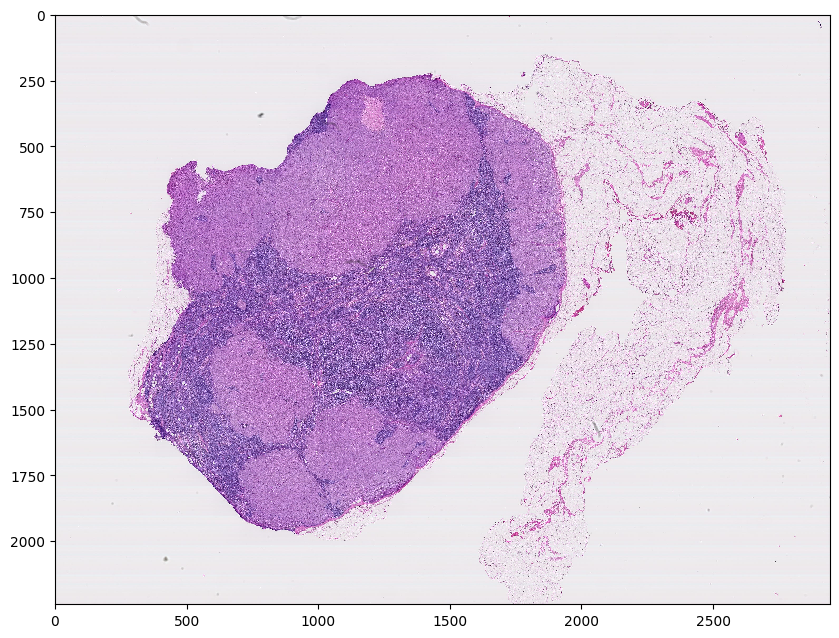

In [ ]:
# Example: read the entire mask at the same zoom level



slide_image = read_slide(slide, 
                         x=0, 
                         y=0, 
                         level=Level, 
                         width=slide.level_dimensions[Level][0], 
                         height=slide.level_dimensions[Level][1])

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(slide_image)

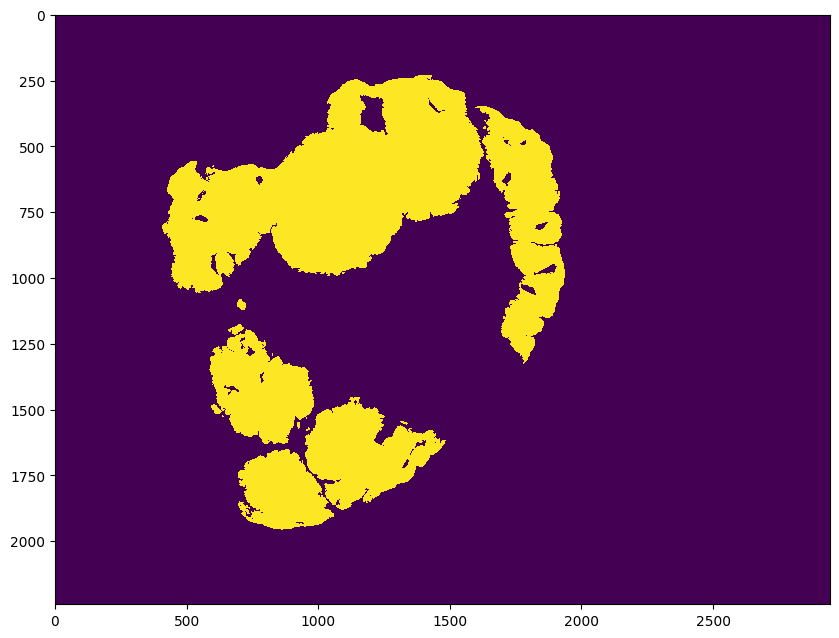

In [ ]:
# Example: read the entire mask at the same zoom level
mask_image = read_slide(tumor_mask, 
                        x=0, 
                        y=0, 
                        level=Level, 
                        width=slide.level_dimensions[Level][0], 
                        height=slide.level_dimensions[Level][1])

# Note: the program provided by the dataset authors generates a mask with R,G,B channels.
# The mask info we need is in the first channel only.
# If you skip this step, the mask will be displayed as all black.
mask_image = mask_image[:,:,0]

plt.figure(figsize=(10,10), dpi=100)
plt.imshow(mask_image)

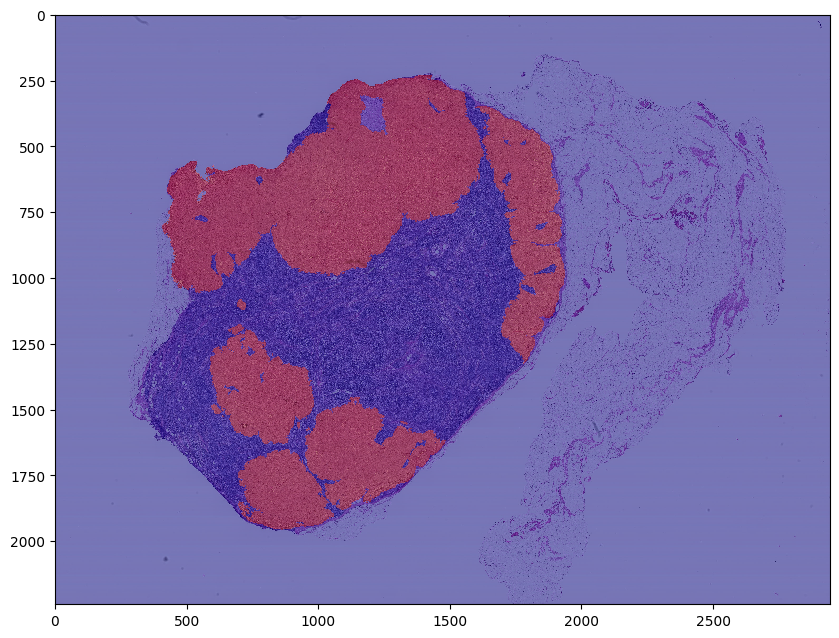

In [ ]:
# Overlay them. The idea is that the mask shows the region of the slide that
# contain cancerous cells.
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(slide_image)
plt.imshow(mask_image, cmap='jet', alpha=0.5) # Red regions contains cancer.

2129295 tissue_pixels pixels (32.3 percent of the image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


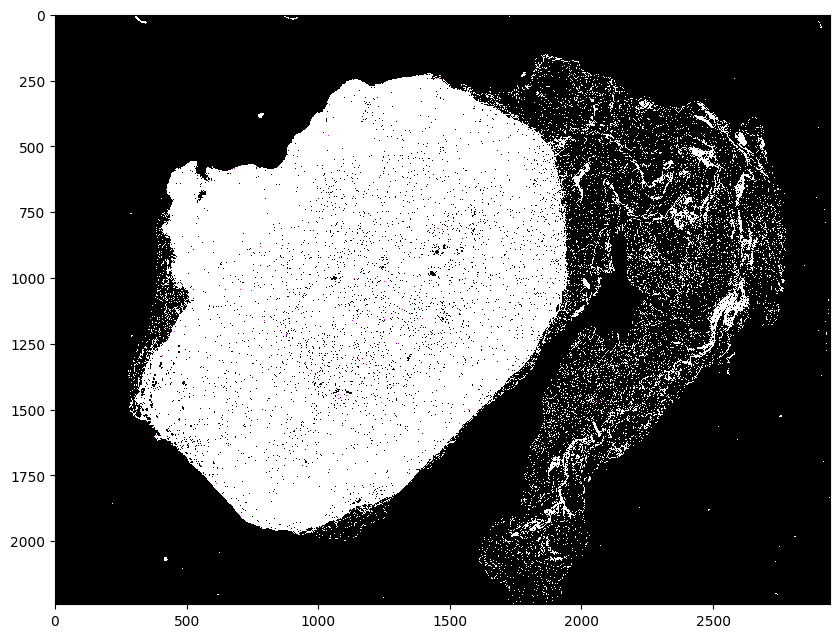

In [ ]:
# As mentioned in class, we can improve efficiency by ignoring non-tissue areas 
# of the slide. We'll find these by looking for all gray regions.
def find_tissue_pixels(image, intensity=0.8):
    im_gray = rgb2gray(image)
    assert im_gray.shape == (image.shape[0], image.shape[1])
    indices = np.where(im_gray <= intensity)
    return zip(indices[0], indices[1])

tissue_pixels = find_tissue_pixels(slide_image)
tissue_pixels = list(tissue_pixels)
percent_tissue = len(tissue_pixels) / float(slide_image.shape[0] * slide_image.shape[1]) * 100
print ("%d tissue_pixels pixels (%.1f percent of the image)" % (len(tissue_pixels), percent_tissue)) 



def apply_mask_RGB(im, mask, color=(1,1,1)):
    masked = np.zeros(im.shape)
    for x,y in mask: masked[x][y] = color
    masked2 = np.multiply(masked, im)
    return masked2
#gray_slide = rgb2gray(slide_image)
tissue_regions = apply_mask_RGB(slide_image, tissue_pixels)
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(tissue_regions)

In [ ]:
def resize_image(image, windowSize):
  #resize RGB image to crop out edges to fit windows
  y_factor = int(image.shape[1]/windowSize[1])
  x_factor = int(image.shape[0]/windowSize[0])
  y_lim = y_factor*windowSize[1]
  x_lim = x_factor*windowSize[0]
  resize = image[0:x_lim, 0:y_lim,:]
  
  return resize

In [ ]:
WINDOW = 150,150
STEP_SIZE = 75

resized_image = resize_image(tissue_regions, WINDOW)


In [ ]:
def resize_mask(image, windowSize):
  #resize mask/grescale image to crop out edges to fit windows
  y_factor = int(image.shape[1]/windowSize[1])
  x_factor = int(image.shape[0]/windowSize[0])
  y_lim = y_factor*windowSize[1]
  x_lim = x_factor*windowSize[0]
  resize = image[0:x_lim, 0:y_lim]

  return resize

In [ ]:
resized_mask = resize_mask(mask_image, WINDOW)

In [ ]:
def sliding_window(image, mask, stepSize,windowSize):
  assert image.shape[0] == mask.shape[0]
  assert image.shape[1] == mask.shape[1]
  tumor_label =[]
  tissue_label = []
  patches = []
  for y in range(0, mask.shape[1]-stepSize, stepSize):
    for x in range(0, mask.shape[0]-stepSize, stepSize):
      mask_patch = mask[x:x + windowSize[0], y:y + windowSize[1]]
      image_patch = image[x:x + windowSize[0], y:y + windowSize[1],:]
      x_mid = int(windowSize[0]/2)
      y_mid = int(windowSize[1]/2)
      half_step = int(stepSize/2)
      mask_region = mask_patch[(x_mid-half_step):(x_mid+half_step), (y_mid-half_step):(y_mid+half_step)]
      image_region = image_patch[(x_mid-half_step):(x_mid+half_step), (y_mid-half_step):(y_mid+half_step),:]

      if np.sum(image_region)>0:
        tissue_label.append(1)
        patches.append(image_patch)
        if np.sum(mask_region)>0:
          tumor_label.append(1)
        else:
          tumor_label.append(0) 
      else:
        tissue_label.append(0)

  patches = np.array(patches)/255
  patches = np.stack(patches, axis=0)

  return patches, tumor_label, tissue_label

(array([415., 264.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

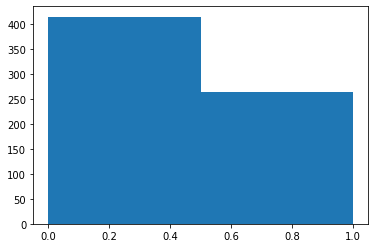

In [ ]:
patches, tumor_label, tissue_label = sliding_window(resized_image, resized_mask, STEP_SIZE, WINDOW)

plt.hist(tumor_label, bins=2)

In [ ]:
len(tissue_label)

999

In [ ]:
test_probas = model.predict(patches)

In [ ]:
test_preds = test_probas[:,1]

In [ ]:
fpr, tpr, thresholds= sklearn.metrics.roc_curve(tumor_label, test_preds)
roc_auc = sklearn.metrics.auc(fpr,tpr)

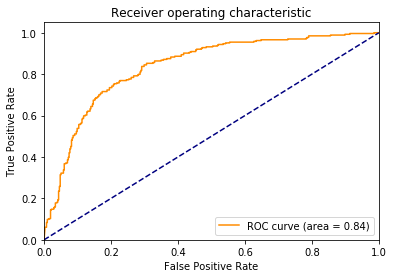

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

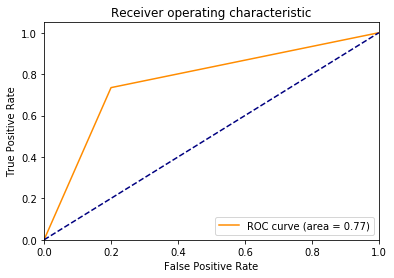

In [ ]:
#FROC tumor locanization
Ffpr, Ftpr, Fthresholds= sklearn.metrics.roc_curve(tumor_label, np.argmax(test_probas, axis=1))
Froc_auc = sklearn.metrics.auc(Ffpr,Ftpr)
plt.figure()
plt.plot(Ffpr, Ftpr, color='darkorange', label='ROC curve (area = %0.2f)' % Froc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Pred will be a 1 column data
def sliding_window_heatmap_prob(tissue_regions, pred, tissue_label, windowSize, StepSize):
  heatmap = np.zeros((tissue_regions.shape[0],tissue_regions.shape[1]))
  i = 0
  b = 0
  x_window = windowSize[0]
  y_window = windowSize[1]
  half_step = int(StepSize/2)
  # slide a window across the image
  for y in range(0, tissue_regions.shape[1]-StepSize, StepSize):
    for x in range(0, tissue_regions.shape[0]-StepSize, StepSize):
      #image_patch = image[x:x + windowSize[0], y:y + windowSize[1],:]
      if tissue_label[i] == 1:
        heatmap[(x+half_step):(x+half_step+StepSize), (y+half_step):(y+half_step+StepSize)] = pred[b]
        b+=1
        #print("b:", b)
        #print("i:", i)  
      i+=1

  print(i)
  print(b)
  return heatmap

In [ ]:
heatmap = sliding_window_heatmap_prob(resized_image, test_preds, tissue_label, WINDOW, STEP_SIZE)

999
679


In [ ]:
len(tissue_label)

999

In [ ]:
tissue_regions.shape

(2240, 2944, 3)

In [ ]:
len(tumor_label)

679

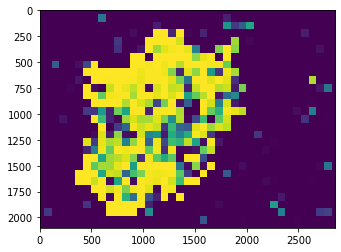

In [ ]:
plt.imshow(heatmap)

In [ ]:
# Pred will be a 2 column data
def sliding_window_heatmap(tissue_regions, pred, tissue_label, windowSize, StepSize):
  heatmap = np.zeros((tissue_regions.shape[0],tissue_regions.shape[1]))
  i = 0
  b = 0
  x_window = windowSize[0]
  y_window = windowSize[1]
  half_step = int(StepSize/2)
  # slide a window across the image
  for y in range(0, tissue_regions.shape[1]-StepSize, StepSize):
    for x in range(0, tissue_regions.shape[0]-StepSize, StepSize):
      #image_patch = image[x:x + windowSize[0], y:y + windowSize[1],:]
      if tissue_label[i] == 1:
        heatmap[(x+half_step):(x+half_step+StepSize), (y+half_step):(y+half_step+StepSize)] = np.argmax(pred[b],axis = 0)
        b+=1
        #print("b:", b)
        #print("i:", i)  
      i+=1

  print(i)
  print(b)
  return heatmap

In [ ]:
heatmap2 = sliding_window_heatmap(resized_image, test_probas, tissue_label, WINDOW, STEP_SIZE)

999
679


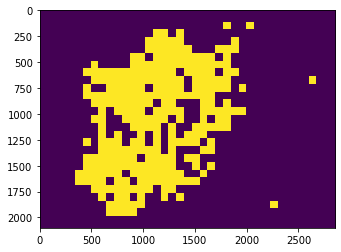

In [ ]:
plt.imshow(heatmap2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


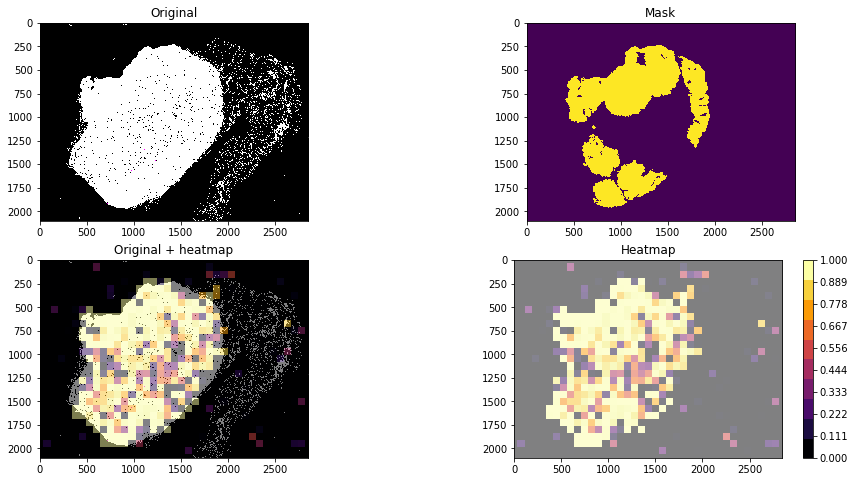

In [ ]:
import matplotlib as mpl

# Plot images
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(resized_image)
ax[0].set_title("Original")


ax[1].imshow(resized_mask)
ax[1].set_title("Mask")


ax[2].imshow(resized_image, vmin=0, vmax=1)
ax[2].imshow(heatmap, alpha=.5, cmap='inferno')
ax[2].set_title("Original + heatmap")
#fig.colorbar(ax[2].imshow(heatmap), ax=ax[2])

ax[3].imshow(heatmap, alpha=.5, cmap='inferno')
ax[3].set_title("Heatmap")

# Specific colorbar
norm = mpl.colors.Normalize(vmin=0,vmax=1)
N = 10
cmap = plt.get_cmap('inferno', N)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ticks=np.linspace(0,1,N), 
             boundaries=np.arange(0,1.1,0.1)) 

#fig.tight_layout()
plt.show()

In [ ]:
len(tissue_label)

999

In [ ]:
slide_image.shape

(2240, 2944, 3)